In [1]:
library(statsr)
library(dplyr)
library(ggplot2)
library(GGally)
data(evals)

Loading required package: BayesFactor
Loading required package: coda
Loading required package: Matrix
************
Welcome to BayesFactor 0.9.12-4.2. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



# 3. Question 3
## Which of the following statements is false about the distribution of score?

- 25% of the students gave their professors a score of over 4.6.
- 11 of students gave a professor a score below 3.
- The median of the distribution is 4.3.
- The left skewness of the data suggests that the students are less likely to rate the professors highly.

In [12]:
# table(evals$score < 3)
# table(evals$score >=  4.6) / nrow(evals)
# hist(evals$score)
# median(evals$score)

# 4- Average beauty score is a statistically significant predictor of evaluation score.

In [13]:
summary(lm(score ~ bty_avg, data=evals))


Call:
lm(formula = score ~ bty_avg, data = evals)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9246 -0.3690  0.1420  0.3977  0.9309 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.88034    0.07614   50.96  < 2e-16 ***
bty_avg      0.06664    0.01629    4.09 5.08e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5348 on 461 degrees of freedom
Multiple R-squared:  0.03502,	Adjusted R-squared:  0.03293 
F-statistic: 16.73 on 1 and 461 DF,  p-value: 5.083e-05


# 5- Use residual plots to evaluate whether the conditions of least squares regression are reasonable. Which of the following statements is an incorrect analysis of the residual plots and conditions

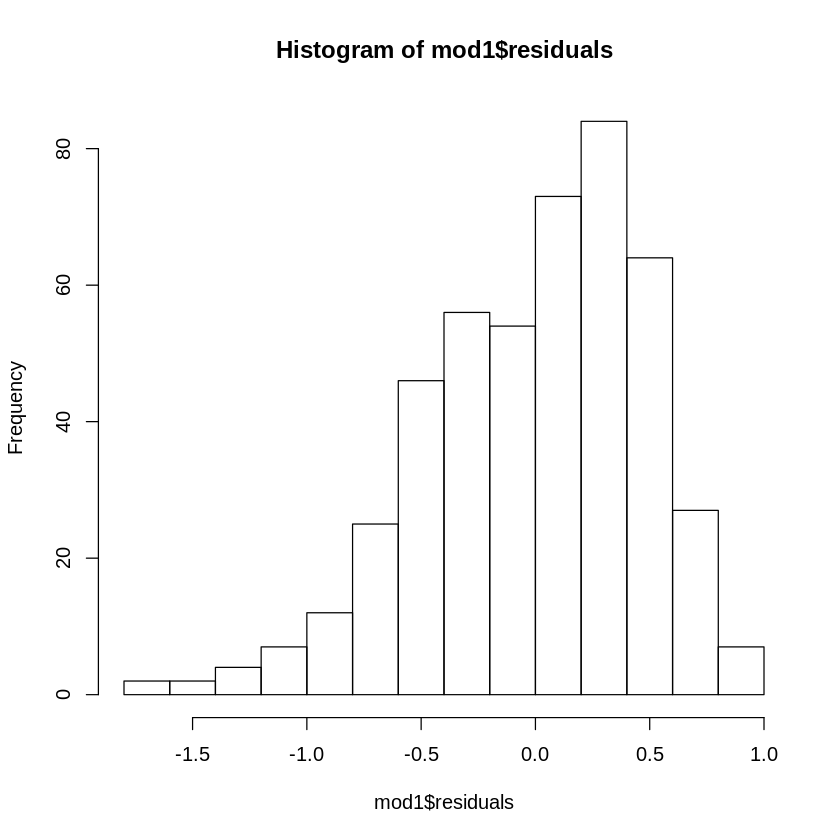

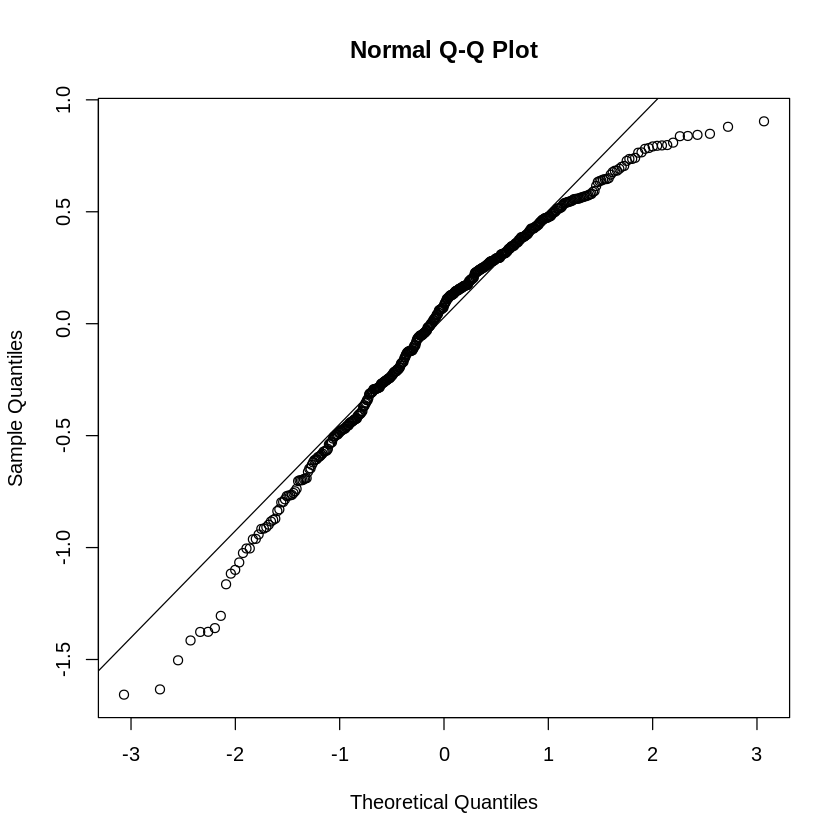

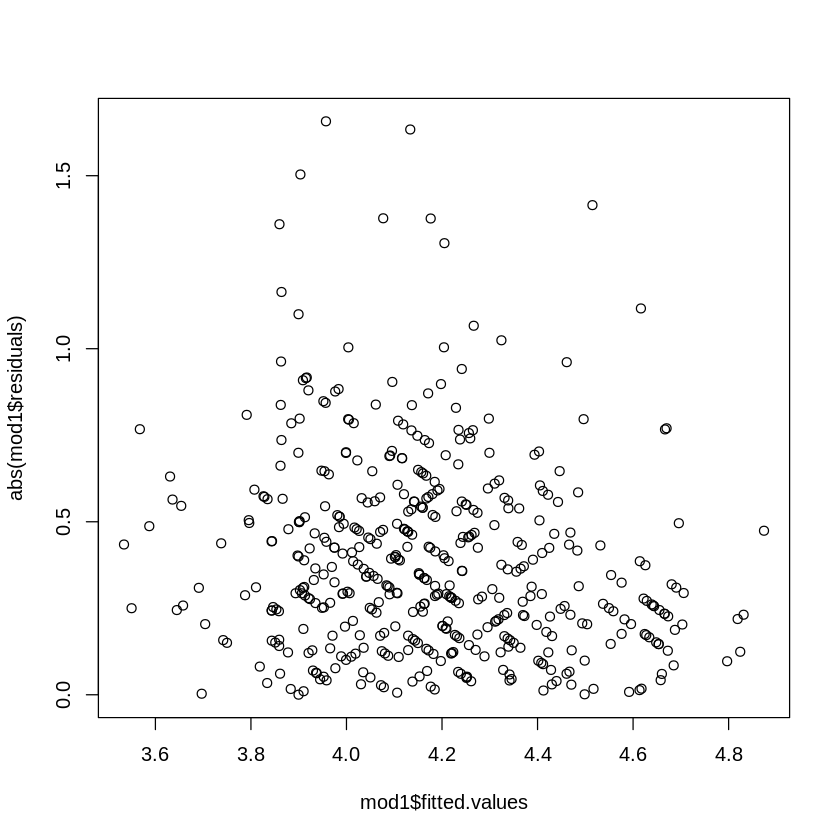

In [14]:
mod1 <- lm(score ~ ., data=evals)
hist(mod1$residuals)
qqnorm(mod1$residuals)
qqline(mod1$residuals)
plot(abs(mod1$residuals) ~ mod1$fitted.values)

# 7- For two professors (one male and one female) who received the same beauty rating, the male professor is predicted to have the higher course evaluation score than the female.

In [15]:
mod2 <- lm(score ~ gender, data=evals)
summary(mod2)


Call:
lm(formula = score ~ gender, data = evals)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.83433 -0.36357  0.06567  0.40718  0.90718 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.09282    0.03867 105.852  < 2e-16 ***
gendermale   0.14151    0.05082   2.784  0.00558 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5399 on 461 degrees of freedom
Multiple R-squared:  0.01654,	Adjusted R-squared:  0.01441 
F-statistic: 7.753 on 1 and 461 DF,  p-value: 0.005583


# 8- Which of the following is the correct order of the three levels of rank if we were to order them from lowest predicted course evaluation score to highest predicted course evaluation score?

In [16]:
model  <- lm(score ~ ., data=evals)
summary(model)


Call:
lm(formula = score ~ ., data = evals)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.65706 -0.29305  0.08147  0.35007  0.90405 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             4.148734   0.320175  12.958  < 2e-16 ***
ranktenure track       -0.173006   0.084516  -2.047  0.04125 *  
ranktenured            -0.085964   0.068284  -1.259  0.20873    
ethnicitynot minority   0.162897   0.084109   1.937  0.05341 .  
gendermale              0.257620   0.053573   4.809 2.09e-06 ***
languagenon-english    -0.250299   0.111415  -2.247  0.02516 *  
age                    -0.008470   0.003313  -2.557  0.01090 *  
cls_perc_eval           0.003259   0.002133   1.528  0.12723    
cls_did_eval            0.002831   0.003148   0.899  0.36897    
cls_students           -0.001472   0.001998  -0.737  0.46175    
cls_levelupper          0.033277   0.059815   0.556  0.57826    
cls_profssingle         0.009305   0.052743   0.176  0.8

In [19]:
m1 <- lm(score ~ .-bty_avg, data=evals)
summary(m1)


m2 <- lm(score ~ .-cls_profs, data=evals)
summary(m2)


m3 <- lm(score ~ .-cls_students, data=evals)
summary(m3)


m4 <- lm(score ~ .-rank, data=evals)
summary(m4)


Call:
lm(formula = score ~ . - bty_avg, data = evals)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.68521 -0.29729  0.09087  0.34795  0.91167 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            4.179530   0.317867  13.149  < 2e-16 ***
ranktenure track      -0.181046   0.083920  -2.157  0.03151 *  
ranktenured           -0.094948   0.067382  -1.409  0.15951    
ethnicitynot minority  0.142636   0.080399   1.774  0.07673 .  
gendermale             0.261391   0.053357   4.899 1.35e-06 ***
languagenon-english   -0.244651   0.111163  -2.201  0.02826 *  
age                   -0.008292   0.003305  -2.509  0.01246 *  
cls_perc_eval          0.003194   0.002131   1.499  0.13456    
cls_did_eval           0.003015   0.003139   0.960  0.33733    
cls_students          -0.001638   0.001987  -0.825  0.41000    
cls_levelupper         0.027523   0.059384   0.463  0.64325    
cls_profssingle        0.003035   0.052171   0.058  0.9536


Call:
lm(formula = score ~ . - cls_profs, data = evals)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.65231 -0.29316  0.08609  0.35534  0.90369 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             4.153239   0.318805  13.028  < 2e-16 ***
ranktenure track       -0.172918   0.084422  -2.048  0.04112 *  
ranktenured            -0.086056   0.068207  -1.262  0.20772    
ethnicitynot minority   0.159842   0.082216   1.944  0.05251 .  
gendermale              0.257977   0.053476   4.824 1.94e-06 ***
languagenon-english    -0.250910   0.111239  -2.256  0.02458 *  
age                    -0.008486   0.003308  -2.565  0.01064 *  
cls_perc_eval           0.003306   0.002114   1.564  0.11854    
cls_did_eval            0.002791   0.003136   0.890  0.37398    
cls_students           -0.001456   0.001994  -0.730  0.46558    
cls_levelupper          0.033179   0.059747   0.555  0.57895    
cls_creditsone credit   0.510496   0.118687 


Call:
lm(formula = score ~ . - cls_students, data = evals)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.66529 -0.29792  0.08259  0.35415  0.93147 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            4.056e+00  2.942e-01  13.784  < 2e-16 ***
ranktenure track      -1.775e-01  8.425e-02  -2.107  0.03564 *  
ranktenured           -8.684e-02  6.824e-02  -1.273  0.20380    
ethnicitynot minority  1.685e-01  8.372e-02   2.013  0.04472 *  
gendermale             2.540e-01  5.332e-02   4.764 2.58e-06 ***
languagenon-english   -2.448e-01  1.111e-01  -2.203  0.02811 *  
age                   -8.565e-03  3.309e-03  -2.589  0.00996 ** 
cls_perc_eval          4.362e-03  1.518e-03   2.873  0.00426 ** 
cls_did_eval           5.570e-04  6.151e-04   0.905  0.36570    
cls_levelupper         4.360e-02  5.812e-02   0.750  0.45360    
cls_profssingle        7.586e-03  5.266e-02   0.144  0.88553    
cls_creditsone credit  5.202e-01  1.193e-


Call:
lm(formula = score ~ . - rank, data = evals)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.71550 -0.30300  0.06512  0.35971  0.92703 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            3.891e+00  2.950e-01  13.189  < 2e-16 ***
ethnicitynot minority  1.898e-01  8.290e-02   2.289  0.02253 *  
gendermale             2.487e-01  5.263e-02   4.726 3.09e-06 ***
languagenon-english   -2.820e-01  1.089e-01  -2.589  0.00993 ** 
age                   -5.994e-03  2.948e-03  -2.033  0.04261 *  
cls_perc_eval          3.229e-03  2.138e-03   1.511  0.13159    
cls_did_eval           3.318e-03  3.142e-03   1.056  0.29143    
cls_students          -1.760e-03  1.997e-03  -0.881  0.37856    
cls_levelupper         2.551e-02  5.954e-02   0.428  0.66857    
cls_profssingle        8.803e-03  5.287e-02   0.166  0.86784    
cls_creditsone credit  5.505e-01  1.144e-01   4.813 2.04e-06 ***
bty_f1lower            1.730e+01  1.580e+01   1.0